In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from trees import MakeSubtree

The following is scratch work for question number 7 of part 2. 

In [33]:
df = pd.read_csv('data/Dbig.txt', delimiter=' ', names=['x1', 'x2', 'y'])
df = df.sample(frac=1) # random permutation of original dataset

train = df.iloc[:8192]
test = df.iloc[8192:]

D32 = train.iloc[:32]
D128 = train.iloc[:128]
D512 = train.iloc[:512]
D2048 = train.iloc[:2048]
D8192 = train

D32_tree = MakeSubtree(D32)
D128_tree = MakeSubtree(D128)
D512_tree = MakeSubtree(D512)
D2048_tree = MakeSubtree(D2048)
D8192_tree = MakeSubtree(D8192)


making leaf...
making leaf...
making leaf...
making leaf...
making leaf...
making leaf...
making leaf...
making leaf...
making leaf...


In [6]:
D32_acc = test[test['y']==0].shape[0]/test.shape[0]
D32_acc

0.3838495575221239

In [19]:
test[(test['x2'] <= -0.709668) & (test['y']==1)].shape[0] + test[(test['x2'] > -0.709668) & (test['x1'] <= 0.901643) & (test['y']==0)].shape[0] + test[(test['x2'] > -0.709668) & (test['x1'] > 0.901643) & (test['y']==1)].shape[0]

1354

In [20]:
test.shape[0]

1808

In [21]:
D128_acc = 1354/1808
D128_acc
# do this procedure for the rest of the trees

0.7488938053097345

In [24]:
D512_acc = 1258/1808
D512_acc

0.6957964601769911

In [25]:
test[(test['x2'] <= -0.854388) & (test['y']==1)].shape[0] + test[(test['x2'] > -0.854388) & (test['x1'] <= -1.086108) & (test['y']==1)].shape[0] + test[(test['x2'] > -0.854388) & (test['x1'] > -1.086108) & (test['x1'] <= 1.102571) & (test['y']==0)].shape[0] + test[(test['x2'] > -0.854388) & (test['x1'] > -1.086108) & (test['x1'] > 1.102571) & (test['y']==1)].shape[0]

1470

In [27]:
D2048_acc = 1470/1808
D2048_acc

0.8130530973451328

In [32]:
test[(test['x2'] <= -0.856291) & (test['y']==1)].shape[0] + test[(test['x2'] > -0.856291) & (test['x1'] <= 1.135738) & (test['y']==0)].shape[0] + test[(test['x2'] > -0.856291) & (test['x1'] > 1.135738) & (test['y']==1)].shape[0]

1259

In [29]:
test[(test['x2'] <= -0.854388) & (test['y']==1)].shape[0] + test[(test['x2'] > -0.854388) & (test['x2'] <= 1.205433) & (test['y']==0)].shape[0] + test[(test['x2'] > -0.854388) & (test['x2'] > 1.205433) & (test['y']==1)].shape[0]

1258

In [35]:
D8192_acc = 1259/1808
D8192_acc

0.6963495575221239

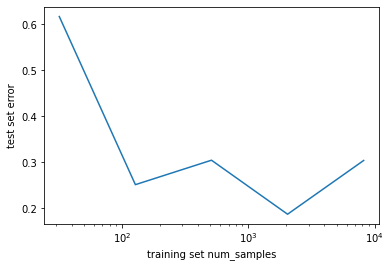

In [40]:
plt.semilogx([32, 128, 512, 2048, 8192], [1-0.3838495575221239, 1-0.7488938053097345, 1-0.6957964601769911, 1-0.8130530973451328, 1-0.6963495575221239 ])
plt.xlabel('training set num_samples')
plt.ylabel('test set error')
plt.savefig('2.7.pdf')
plt.show()


$D_{32}$ tree: {0} (1 node, test set accuracy of 38\%)\\
$D_{128}$ tree: {`$x_2 \leq$  -0.709668': [1, {`$x_1 \leq$  0.901643': [0, 1]}]} (5 nodes, test set accuracy of 75\%) \\
$D_{512}$ tree:  {`$x_2 \leq$  -0.854388': [1, {`$x_1 \leq$  1.205433': [0, 1]}]} (5 nodes, test set accuracy of 70\%) \\
$D_{2048}$ tree: {`$x_2 \leq$  -0.854388': [1, {`$x_1  \leq$ -1.086108': [1, {`$x_1 \leq$  1.102571': [0, 1]}]}]} (7 nodes, test set accuracy of 81\%)\\
$D_{8192}$ tree: {`$x_2 \leq$  -0.856291': [1, {`$x_1 \leq$  1.135738': [0, 1]}]} (5 nodes, test set accuracy of 70\%)\\

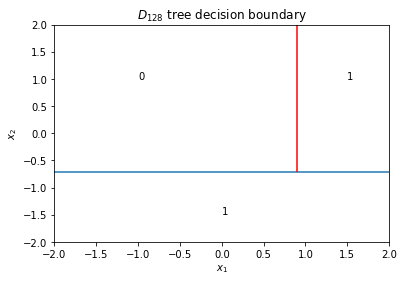

In [69]:
plt.axhline(-0.709668)
plt.vlines(0.901643, ymin=-0.709668, ymax=2, color='red')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$D_{128}$ tree decision boundary')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.text(0,-1.5, '1')
plt.text(-1,1, '0')
plt.text(1.5,1, '1')
plt.savefig('d128decisionboundary.pdf')
plt.show()


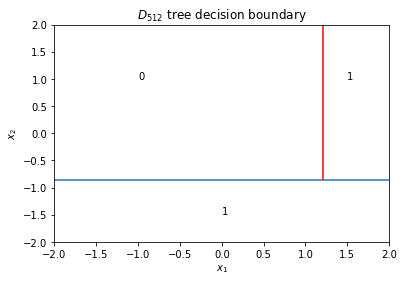

In [70]:
plt.axhline(-0.854388)
plt.vlines(1.205433, ymin=-0.854388, ymax=2, color='red')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$D_{512}$ tree decision boundary')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.text(0,-1.5, '1')
plt.text(-1,1, '0')
plt.text(1.5,1, '1')
plt.savefig('d512decisionboundary.pdf')
plt.show()

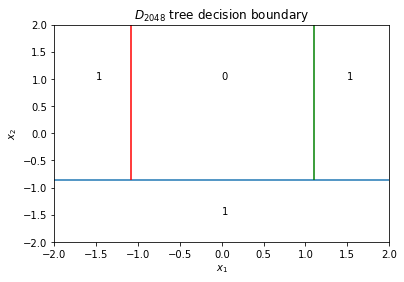

In [74]:
plt.axhline(-0.854388)
plt.vlines(-1.086108, ymin=-0.854388, ymax=2, color='red')
plt.vlines(1.102571, ymin=-0.854388, ymax=2, color='green')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$D_{2048}$ tree decision boundary')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.text(0,-1.5, '1')
plt.text(-1.5,1, '1')
plt.text(0,1, '0')
plt.text(1.5,1, '1')
plt.savefig('d2048decisionboundary.pdf')
plt.show()

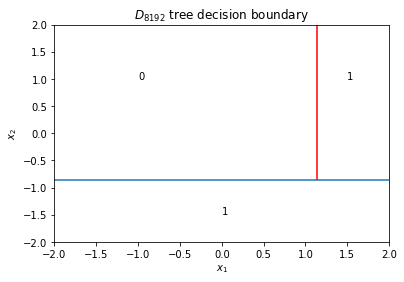

In [75]:
plt.axhline(-0.856291)
plt.vlines(1.135738, ymin=-0.856291, ymax=2, color='red')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$D_{8192}$ tree decision boundary')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.text(0,-1.5, '1')
plt.text(-1,1, '0')
plt.text(1.5,1, '1')
plt.savefig('d8192decisionboundary.pdf')
plt.show()

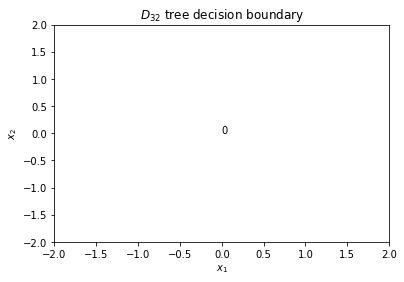

In [76]:
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$D_{32}$ tree decision boundary')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.text(0,0, '0')
plt.savefig('d32decisionboundary.pdf')
plt.show()

The following is scratch work for part 3 (sklearn implementation).

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
size = [D32, D128, D512, D2048, D8192]
num_leaves = []
errors = []
for i in size:
    clf  = DecisionTreeClassifier()
    sklearn_tree = clf.fit(i.drop('y', axis=1), i['y'])
    errors.append(1 - sklearn_tree.score(test.drop('y', axis=1), test['y']))
    num_leaves.append(sklearn_tree.get_n_leaves())

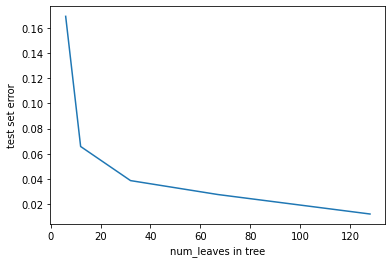

In [96]:
plt.plot(num_leaves, errors)
plt.xlabel('num_leaves in tree')
plt.ylabel('test set error')
plt.savefig('sklearn_leaves_vs_error.pdf')
plt.show()

The following is scratch work for part 4 (Lagrange Interpolation).

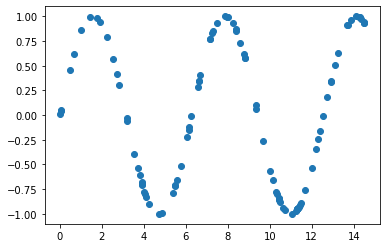

In [283]:
a = 0
b=15
x = np.random.uniform(a,b,100)
x_test = np.random.uniform(a,b,100)
y = np.sin(x)
plt.scatter(x, y)

In [265]:
from scipy import interpolate
f = interpolate.BarycentricInterpolator(x, y) #scipy.interpolate.lagrange is numerically unstable for greater than 20 points
yn = f(x_test)


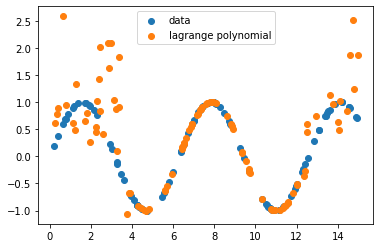

In [266]:
plt.scatter(x, y, label='data')
plt.scatter(x_test, yn, label='lagrange polynomial')
plt.legend()
plt.savefig('lagrange_interpolation.pdf')
plt.show()

In [267]:
yerr = np.sin(x_test) - yn
error = np.sqrt(np.sum(yerr**2)/100)
error

0.5606497887310034

In [240]:
a = 0
b=15
noise = np.random.normal(0,1,100) # gaussian noise with mean 0 and std dev 1 
x_noisy = np.random.uniform(a,b,100) + noise
x_test = np.random.uniform(a,b,100)
y = np.sin(x)

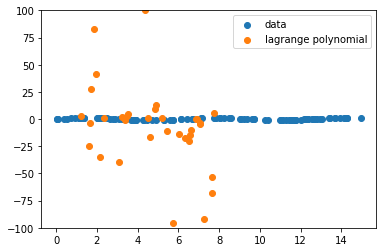

32208450052.086613

In [286]:
f = interpolate.BarycentricInterpolator(x_noisy, y)
yn = f(x_test)
yerr = np.sin(x_test) - yn
error = np.sqrt(np.sum(yerr**2)/100)
plt.scatter(x, y, label='data')
plt.scatter(x_test, yn, label='lagrange polynomial')
plt.ylim(-100,100)
plt.legend()
plt.savefig('lagrange_gaussian_noise.pdf')
plt.show()
error

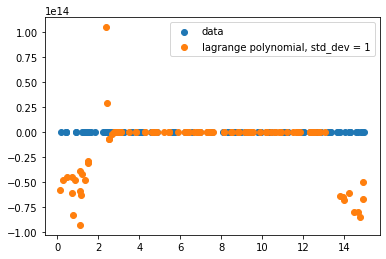

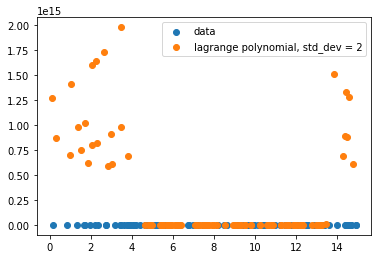

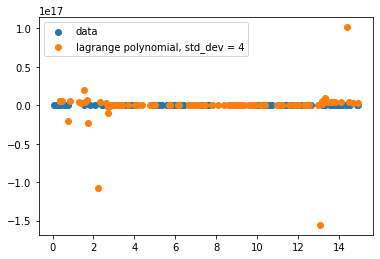

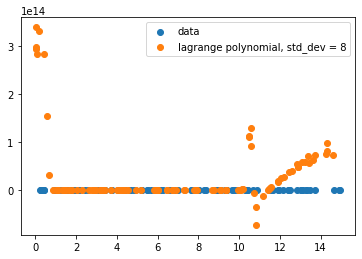

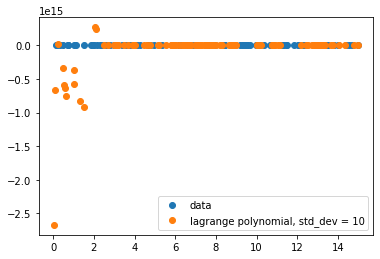

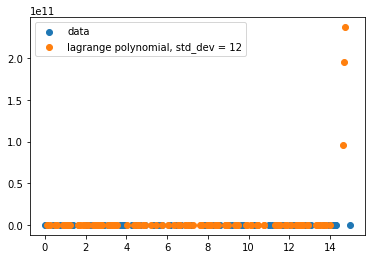

[32072342869387.35,
 569498367842221.5,
 2.1958285120568776e+16,
 83880349181678.47,
 333655040422594.6,
 32220207704.346954]

In [285]:
errors = []
std_dev = [1,2,4,8,10,12]
for i in range(len(std_dev)):
    x = np.random.uniform(a,b,100)
    y = np.sin(x)
    x_test = np.random.uniform(a,b,100)
    noise = np.random.normal(0,std_dev[i],100) # gaussian noise with mean 0 and std dev 
    x_noisy = x + noise
    f = interpolate.BarycentricInterpolator(x_noisy, y)
    yn = f(x_test)

    yerr = np.sin(x_test) - yn
    error = np.sqrt(np.sum(yerr**2)/100)
    errors.append(error)

    plt.scatter(x, y, label='data')
    plt.scatter(x_test, yn, label='lagrange polynomial, std_dev = ' + str(std_dev[i]))
    plt.legend()
    plt.savefig('lagrange_gaussian_noise_' + str(std_dev[i]) +'.pdf')
    plt.show()
errors